# All Rights Reserved © 2024 Ali Eshragh
# Computer Lab 1:  Introduction to Python for Time Series Analysis

## I. Time Series Plot

### 1. <span>Visit [here](https://www.stat.pitt.edu/stoffer/tsa4/) to access the textbook website.<span>

### 2. Install and import appropriate modules

In [1]:
# The authors of the textbook have developed an R package, namely astsa (Applied Statistical Time Series Analysis). 
# In order to access all time series datasets in the package astsa in Python, which are discussed in the textbook, 
# install astsadata in Python.

!pip install astsadata


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from astsadata import *


/opt/anaconda3/lib/python3.11/site-packages/astsadata/astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.11/site-packages/astsadata/astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
/opt/anaconda3/lib/python3.11/site-packages/astsadata/astsadata.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicken = pd.read_csv(f"{path}/data/chicken.csv", index_col=0, parse_date

In [3]:
print(dir(astsadata))


['EQ5', 'EQcount', 'EXP6', 'HCT', 'Lynx', 'PLT', 'UnempRate', 'WBC', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'ar1miss', 'arf', 'beamd', 'birth', 'blood', 'bnrf1ebv', 'bnrf1hv', 'cardox', 'chicken', 'climhyd', 'cmort', 'cpg', 'djia', 'econ5', 'eqexp', 'flu', 'fmri1', 'gas', 'gdp', 'globtemp', 'globtempl', 'gnp', 'gtemp', 'gtemp2', 'gtemp_land', 'gtemp_ocean', 'hor', 'jj', 'lap', 'lead', 'nyse', 'oil', 'os', 'part', 'path', 'pd', 'polio', 'prodn', 'qinfl', 'qintr', 'rec', 'sales', 'salmon', 'salt', 'saltemp', 'so2', 'soi', 'soiltemp', 'speech', 'star', 'sunspotz', 'tempr', 'unemp', 'varve']


### 3. Case Study: Johnson & Johnson Quarterly Earnings per Share

In [4]:
# This time series data includes quarterly earnings per share for the U.S. company Johnson & Johnson, furnished by 
# Professor Paul Griffin (personal communication) of the Graduate School of Management, University of California, 
# Davis. There are 84 quarters (21 years) measured from the first quarter of 1960 to the last quarter of 1980. 

jj.info()
print('\n', jj.head())


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 84 entries, 1960Q1 to 1980Q4
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB

         value
index        
1960Q1   0.71
1960Q2   0.63
1960Q3   0.85
1960Q4   0.44
1961Q1   0.61


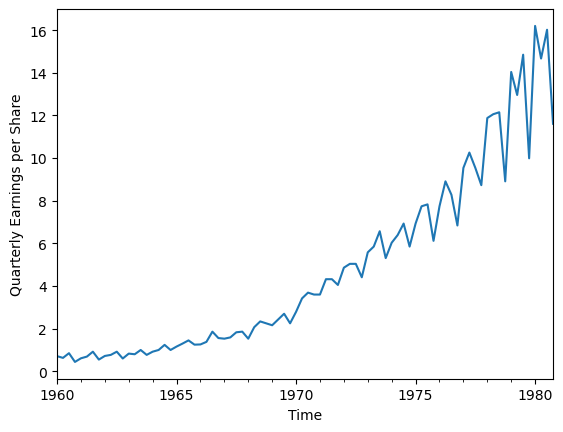

In [5]:
# Example 1.1: Time series plot

jj.plot(xlabel='Time', ylabel='Quarterly Earnings per Share', legend=False)
plt.show()


### 4. Case Study: Global Warming

In [6]:
# This time series data includes the annual global temperature series record. The data are the global mean land–ocean 
# temperature index from 1880 to 2015, with the base period 1951-1980. In particular, the data are deviations, 
# measured in degrees centigrade, from the 1951-1980 average, and are an update of Hansen et al. (2006).

globtemp.info()
print('\n', globtemp.head())


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 136 entries, 1880 to 2015
Freq: A-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   136 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB

        value
index       
1880   -0.20
1881   -0.11
1882   -0.10
1883   -0.20
1884   -0.28


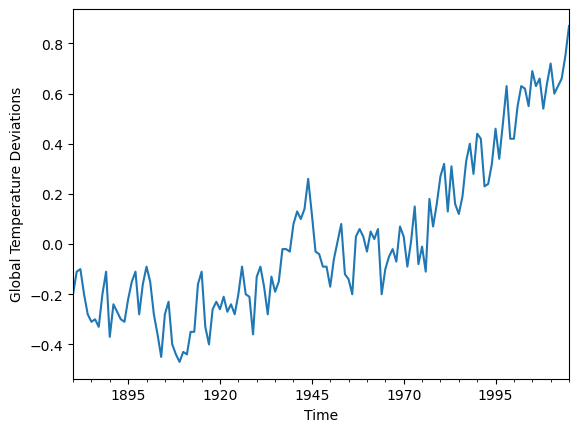

In [7]:
# Example 1.2: Time series plot

globtemp.plot(xlabel='Time', ylabel='Global Temperature Deviations', legend=False)
plt.show()


### 5. Case Study: Southern Oscillation Index & Recruitment

In [8]:
# Consider analyzing multiple time series simultaneously. The Southern Oscillation Index (SOI) time series data
# consist of monthly values measuring changes in air pressure, which are related to sea surface temperatures in 
# the central Pacific Ocean. The Recruitment time series data include the monthly number of new fish provided 
# by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries Group. Both series span 453 months, covering 
# the years 1950 to 1987.

print(type(soi))
print(soi.shape)
print(soi.head(),'\n')

print(type(rec))
print(rec.shape)
print(rec.head())


<class 'pandas.core.frame.DataFrame'>
(453, 1)
         value
index         
1950-01  0.377
1950-02  0.246
1950-03  0.311
1950-04  0.104
1950-05 -0.016 

<class 'pandas.core.frame.DataFrame'>
(453, 1)
         value
index         
1950-01  68.63
1950-02  68.63
1950-03  68.63
1950-04  68.63
1950-05  68.63


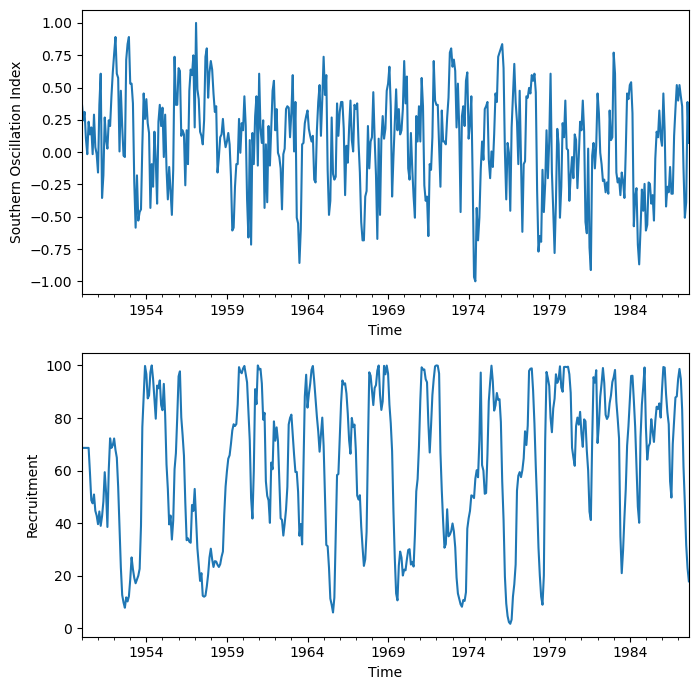

In [9]:
# Example 1.5: Time series plots

fig, axes = plt.subplots(nrows=2, figsize=(7, 7))  # Adjusted figsize

soi.plot(ax=axes[0], xlabel='Time', ylabel='Southern Oscillation Index', legend=False)
rec.plot(ax=axes[1], xlabel='Time', ylabel='Recruitment', legend=False)
fig.tight_layout()
plt.show()


## II. Correlation

### 6. Scatter Plot

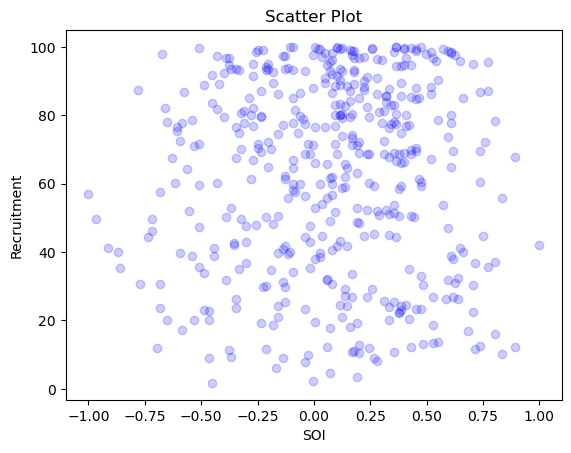

In [10]:
plt.scatter(soi.value, rec.value, color='blue', alpha=0.2)  
plt.title('Scatter Plot')  
plt.xlabel('SOI') 
plt.ylabel('Recruitment') 

plt.show()


### 7. Pearson's Correlation Coefficient Test

In [11]:
rho, p_value = stats.pearsonr(soi.value, rec.value)

print('correlation coefficient = %.3f, p_value = %.3f\n' % (rho, p_value))

# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'The two samples show no correlation (fail to reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')
else:
    print(f'The two samples exhibit correlation (reject "H0: rho=0" at a {100*alpha:.0f}% significance level).')


correlation coefficient = 0.025, p_value = 0.596

The two samples show no correlation (fail to reject "H0: rho=0" at a 5% significance level).


## III. Normal Distribution 

### 8. Histogram

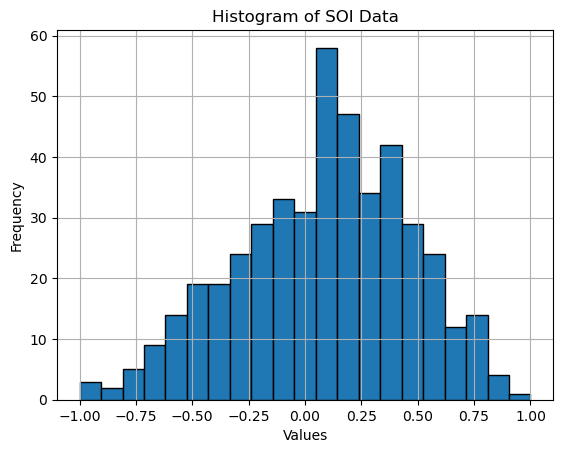

In [12]:
# A common rule of thumb is to use the square root of the number of data points for the number of bins. 

plt.hist(soi, bins=round(np.sqrt(len(soi))), edgecolor='black')  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of SOI Data')
plt.grid(True)
plt.show()


### 9. Shapiro-Wilk Normality Test

In [13]:
sw_stat, p_value = stats.shapiro(soi.value)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')


Shapiro-Wilk test statistic: 0.990, p-value: 0.004

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


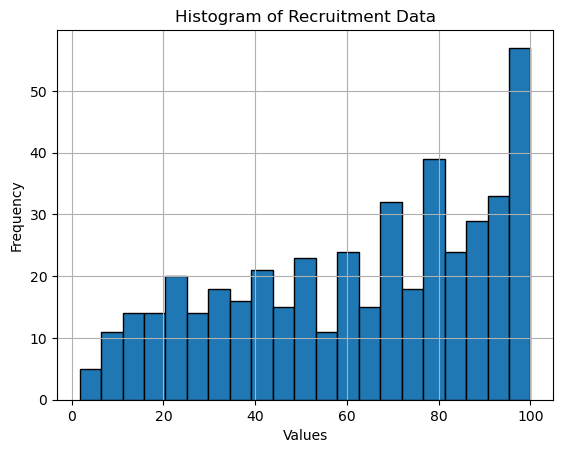

Shapiro-Wilk test statistic: 0.934, p-value: 0.000

Sample does not appear to be normally distributed (reject "H0: Data is normal" at a 5% significance level).


In [14]:
# Recruitment time series data

plt.hist(rec, bins=round(np.sqrt(len(rec))), edgecolor='black')  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Recruitment Data')
plt.grid(True)
plt.show()

sw_stat, p_value = stats.shapiro(rec)

print(f'Shapiro-Wilk test statistic: {sw_stat:.3f}, p-value: {p_value:.3f}\n')

# Interpret the result
alpha = 0.05
if p_value >= alpha:
    print(f'Sample appears to be normally distributed (fail to reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')
else:
    print(f'Sample does not appear to be normally distributed (reject "H0: Data is normal" at a {100*alpha:.0f}% significance level).')


### 10. Pairwise Plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


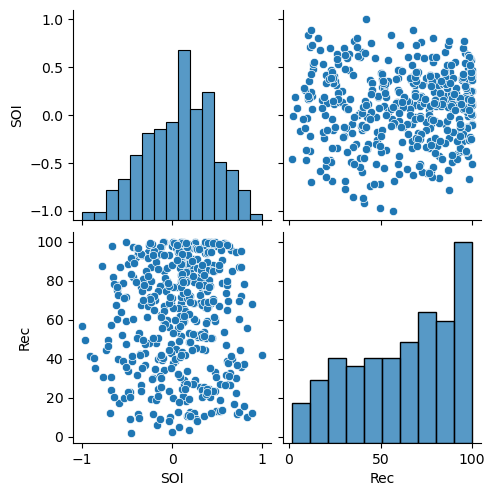

In [15]:
# Plot pairwiserelationships for multiple datasets, creating scatterplots for pairs of datasets in off-diagonal 
# positions and histograms for each dataset along the diagonal

df = pd.DataFrame({'SOI': soi.value,'Rec': rec.value})

# Create a pairplot
sns.pairplot(df)

# Show plot
plt.show()


## IV. Assignment 1

- Consider the two time series 'oil' and 'gas' from the 'astsadata' dataset. The oil series is in dollars per barrel, while the gas series is in cents per gallon. 

<ol style='list-style-type: lower-roman';>
<li>Write a brief intro about the two time series datasets.</li>
<li>Plot both time series in one frame.</li>
<li>Plot the pairplot and explain your observations.</li>
<li>Test whether each time series data is normally distributed.</li>
<li>Test whether the two time series data are correlated.</li>
</ol>

## V. References

1. R.H. Shumway and D.S. Stoffer, _Time Series Analysis and Its Applications With R Examples_, Springer, New York, 2017.